In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('crypto.csv', header=[0, 1], index_col=0, parse_dates=[0])
df.head(2)

Price          close                                                   \
Ticker           ada          btc      doge         eth sol       xrp   
Date                                                                    
2020-01-01  0.033458  7200.174316  0.002033  130.802002 NaN  0.192667   
2020-01-02  0.032751  6985.470215  0.002009  127.410179 NaN  0.188043   

Price           High                                     ...      Open  \
Ticker           ada          btc      doge         eth  ...      doge   
Date                                                     ...             
2020-01-01  0.033813  7254.330566  0.002052  132.835358  ...  0.002028   
2020-01-02  0.033507  7212.155273  0.002110  130.820038  ...  0.002034   

Price                                   volume                         \
Ticker             eth sol       xrp       ada          btc      doge   
Date                                                                    
2020-01-01  129.630661 NaN  0.192912  22948374  18565664997  51180941   
2020-01-02  130.820038 NaN  0.192708  20843934  20802083465  65071106   

Price                                   
Ticker             eth sol         xrp  
Date                                    
2020-01-01  7935230330 NaN  1041134003  
2020-01-02  8032709256 NaN  1085351426  

[2 rows x 30 columns]

In [3]:
df_price = df['close'].copy()
df_price.head(2)

Ticker,ada,btc,doge,eth,sol,xrp
Date,,,,,,
2020-01-01,0.033458,7200.174316,0.002033,130.802002,NaN,0.192667
2020-01-02,0.032751,6985.470215,0.002009,127.410179,NaN,0.188043


In [4]:
df_volume = df['volume']
df_volume.head(2)

Ticker,ada,btc,doge,eth,sol,xrp
Date,,,,,,
2020-01-01,22948374,18565664997,51180941,7935230330,NaN,1041134003
2020-01-02,20843934,20802083465,65071106,8032709256,NaN,1085351426


In [5]:
df_price = df_price.dropna().copy()
df_price.head(2)

Ticker,ada,btc,doge,eth,sol,xrp
Date,,,,,,
2020-04-10,0.033215,6865.493164,0.001968,158.412445,0.951054,0.187464
2020-04-11,0.033354,6859.083008,0.001990,158.216019,0.776819,0.188063


In [6]:
df_price.describe()

Ticker,ada,btc,doge,eth,sol,xrp
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,0.663202,40694.472444,0.122101,2115.578003,74.038870,0.695389
std,0.564493,23445.336027,0.104517,1080.184366,71.063678,0.558385
min,0.031863,6642.109863,0.001940,153.286896,0.515273,0.175870
25%,0.312765,22429.757812,0.062167,1507.165894,18.909475,0.388465
50%,0.446665,36926.066406,0.086013,1961.701538,37.415070,0.526246
75%,0.932902,57431.023438,0.164166,2973.657227,138.099991,0.733287
max,2.968239,106146.265625,0.684777,4812.087402,261.869751,3.298635


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X = df_price
X.head(2)

Ticker,ada,btc,doge,eth,sol,xrp
Date,,,,,,
2020-04-10,0.033215,6865.493164,0.001968,158.412445,0.951054,0.187464
2020-04-11,0.033354,6859.083008,0.001990,158.216019,0.776819,0.188063


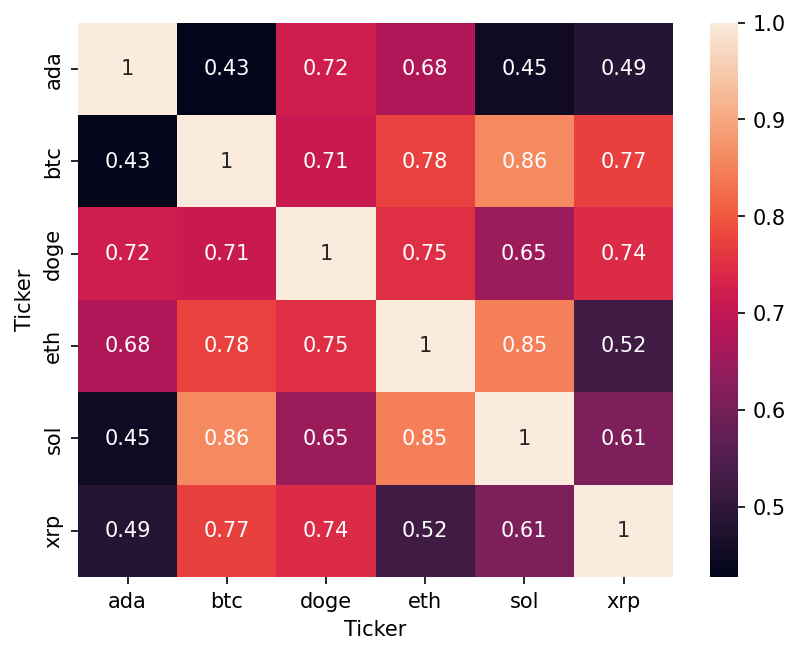

In [9]:
plt.figure(dpi=150)

sns.heatmap(df_price.corr(), annot=True)

plt.show()

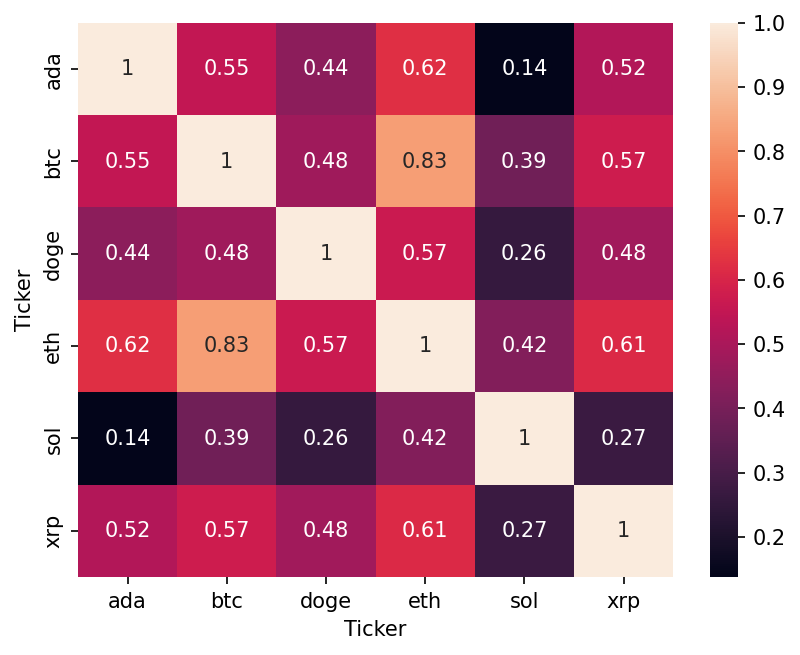

In [10]:
plt.figure(dpi=150)
sns.heatmap(df_volume.corr(), annot=True)
plt.show()

In [11]:
for coin in ['ada', 'btc', 'doge', 'eth', 'sol', 'xrp']:
    df_price[f'log_return_{coin}'] = np.log(df_price[coin] / df_price[coin].shift(1))

In [12]:
df_price = df_price.dropna()
df_price.head(2)

Ticker,ada,btc,doge,eth,sol,xrp,log_return_ada,log_return_btc,log_return_doge,log_return_eth,log_return_sol,log_return_xrp
Date,,,,,,,,,,,,
2020-04-11,0.033354,6859.083008,0.00199,158.216019,0.776819,0.188063,0.004176,-0.000934,0.011117,-0.001241,-0.202363,0.003190
2020-04-12,0.033806,6971.091797,0.00199,161.142426,0.882507,0.190135,0.013461,0.016198,0.000000,0.018327,0.127559,0.010957


In [13]:
log_columns = [col for col in df_price.columns if col.startswith('log_')]
df_return = df_price[log_columns]
df_return.head(2)

Ticker,log_return_ada,log_return_btc,log_return_doge,log_return_eth,log_return_sol,log_return_xrp
Date,,,,,,
2020-04-11,0.004176,-0.000934,0.011117,-0.001241,-0.202363,0.003190
2020-04-12,0.013461,0.016198,0.000000,0.018327,0.127559,0.010957


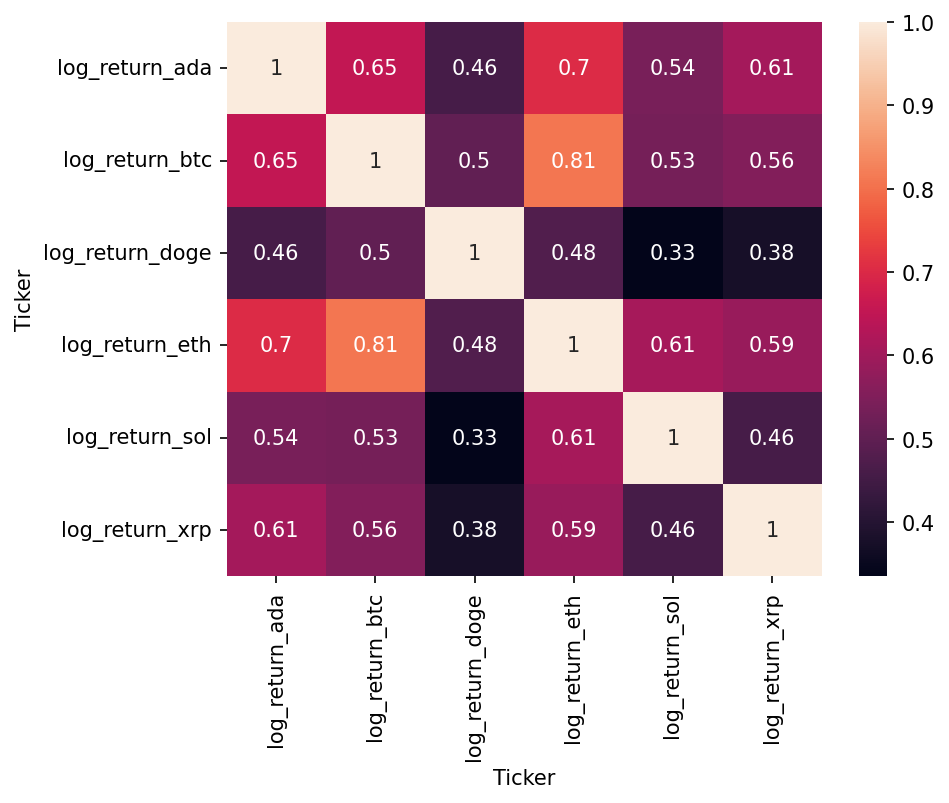

In [14]:
plt.figure(dpi=150)
sns.heatmap(df_return.corr(), annot=True)
plt.show()

In [19]:
plt.figure(dpi=150)
df_pair = df_return[['log_return_btc', 'log_return_eth', 'log_return_ada']]
df_pair.head(2)

Ticker,log_return_btc,log_return_eth,log_return_ada
Date,,,
2020-04-11,-0.000934,-0.001241,0.004176
2020-04-12,0.016198,0.018327,0.013461


<Figure size 960x720 with 0 Axes>

<Figure size 960x720 with 0 Axes>

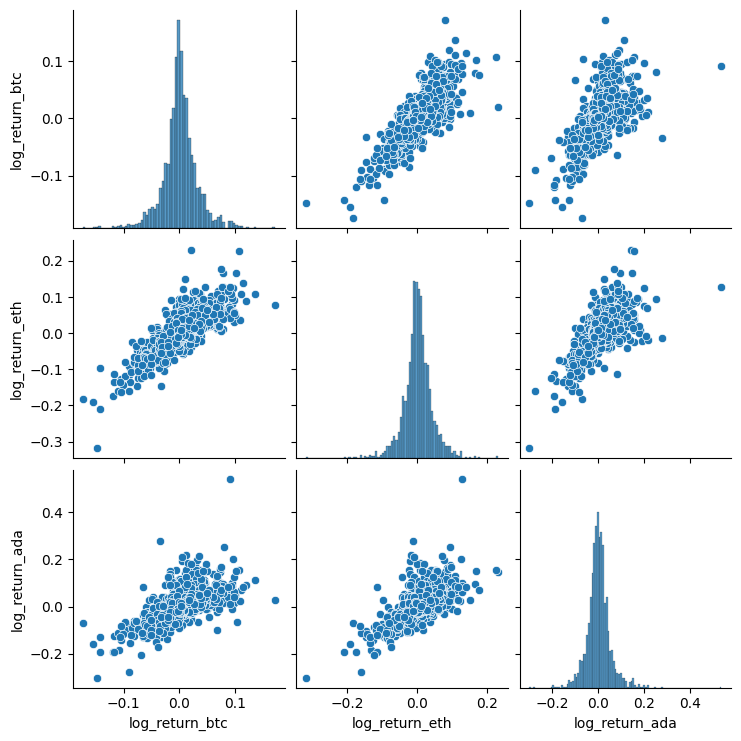

In [23]:
plt.figure(dpi=150)
sns.pairplot(data=df_pair)

plt.show()